In [264]:
import pandas as pd
import matplotlib.pyplot as plt

In [265]:
dataset = pd.read_csv('data/KMeansData.csv')
dataset.head()
dataset.shape

(100, 2)

In [266]:
X = dataset.iloc[:, :].values
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

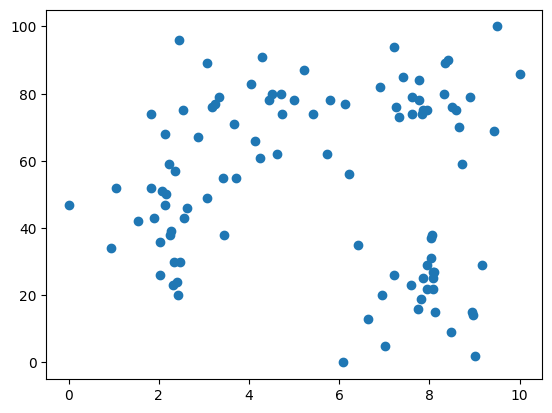

In [267]:
plt.scatter(X[:, 0], X[:,1])
plt.show()

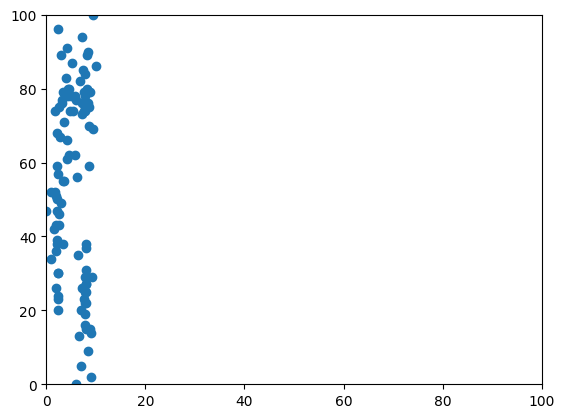

In [268]:
plt.scatter(X[:, 0], X[:,1])
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

In [269]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)
X_trans[:5], X[:5]

(array([[ 0.68729921,  0.73538376],
        [-0.66687438,  0.04198891],
        [-0.77161709,  0.04198891],
        [-0.9100271 ,  1.35173473],
        [-0.8090252 ,  0.96651537]]),
 array([[ 7.33, 73.  ],
        [ 3.71, 55.  ],
        [ 3.43, 55.  ],
        [ 3.06, 89.  ],
        [ 3.33, 79.  ]]))

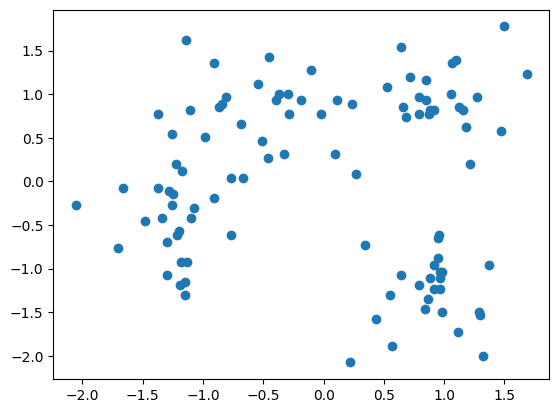

In [270]:
plt.scatter(X_trans[:, 0], X_trans[:, 1])
plt.show()

In [1]:
def model_kmeans(K):
    import pandas as pd
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=K, random_state=0)

    dataset = pd.read_csv('data/KMeansData.csv')
    X = dataset.iloc[:, [0,1]].values
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_trans = scaler.fit_transform(X)
    kmeans.fit(X_trans)
    
    centers_org = scaler.inverse_transform(kmeans.cluster_centers_)

    return kmeans, X, X_trans, centers_org

In [271]:
from sklearn.cluster import KMeans

inertia_list = [] #각 점들에서 중심점까지 거리제곱의 합
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_trans)
    inertia_list.append(kmeans.inertia_)

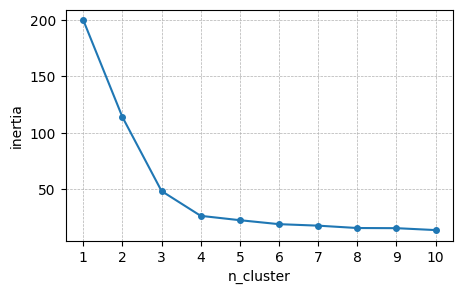

In [ ]:
inertia_list = [] #각 점들에서 중심점까지 거리제곱의 합
for i in range(1, 11):
    kmeans, X, X_trans, centers_org = model_kmeans(i)
    kmeans.fit(X_trans)
    inertia_list.append(kmeans.inertia_)

import matplotlib.pyplot as plt
x = list(range(1, 11))
y = inertia_list

plt.figure(figsize=(5, 3))
plt.plot(x, y, marker='o', ms=4) #그룹의 개수 정하기
plt.xticks([x for x in range(1, 11, 1)])
plt.grid(True, ls='--', lw=0.5)
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.show()

In [273]:
K = 4
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(X_trans)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [274]:
y_pred = kmeans.fit_predict(X_trans)
y_pred, X[:5]

(array([1, 0, 3, 0, 0, 2, 2, 0, 1, 0, 0, 3, 2, 3, 3, 0, 2, 1, 3, 0, 2, 0,
        3, 2, 1, 1, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0, 0, 0, 3, 2, 1, 3,
        3, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 1, 2,
        2, 0, 2, 1, 3, 1, 1, 1, 3, 3, 3, 3, 0, 1, 2, 1, 2, 2, 1, 0, 3, 2,
        1, 3, 0, 2, 0, 1, 3, 0, 1, 0, 2, 3], dtype=int32),
 array([[ 7.33, 73.  ],
        [ 3.71, 55.  ],
        [ 3.43, 55.  ],
        [ 3.06, 89.  ],
        [ 3.33, 79.  ]]))

In [275]:
dataset['cluster'] = y_pred
dataset.head()

,hour,score,cluster
0,7.33,73,1
1,3.71,55,0
2,3.43,55,3
3,3.06,89,0
4,3.33,79,0


In [276]:
import numpy as np
index = np.where(y_pred==0)
index

(array([ 1,  3,  4,  7,  9, 10, 15, 19, 21, 33, 37, 38, 39, 47, 51, 54, 55,
        56, 57, 67, 78, 85, 90, 92, 95, 97]),)

In [277]:
filt = dataset['cluster']==0
dataset[filt].index

Index([ 1,  3,  4,  7,  9, 10, 15, 19, 21, 33, 37, 38, 39, 47, 51, 54, 55, 56,
       57, 67, 78, 85, 90, 92, 95, 97],
      dtype='int64')

In [278]:
X[index, 0], X[index, 1]

(array([[3.71, 3.06, 3.33, 5.74, 4.73, 5.  , 4.13, 3.67, 2.86, 4.5 , 5.43,
         4.44, 3.17, 1.83, 2.53, 4.61, 4.04, 4.25, 2.44, 4.71, 4.29, 3.24,
         2.13, 5.8 , 6.21, 5.22]]),
 array([[55., 89., 79., 62., 74., 78., 66., 71., 67., 80., 74., 78., 76.,
         74., 75., 62., 83., 61., 96., 80., 91., 77., 68., 78., 56., 87.]]))

In [279]:
for i in range(K):
    index = np.where(y_pred==i)
    print(i, X[index, 0], X[index, 1])

0 [[3.71 3.06 3.33 5.74 4.73 5.   4.13 3.67 2.86 4.5  5.43 4.44 3.17 1.83
  2.53 4.61 4.04 4.25 2.44 4.71 4.29 3.24 2.13 5.8  6.21 5.22]] [[55. 89. 79. 62. 74. 78. 66. 71. 67. 80. 74. 78. 76. 74. 75. 62. 83. 61.
  96. 80. 91. 77. 68. 78. 56. 87.]]
1 [[ 7.33  8.73  7.61  8.42  6.12  8.66  7.95  7.42  9.43  7.21  8.34  8.5
   6.91  7.26  7.76  8.58  7.83  7.85  9.5   8.33  7.61  8.89 10.    7.76]] [[ 73.  59.  74.  90.  77.  70.  75.  85.  69.  94.  89.  76.  82.  76.
   78.  75.  74.  75. 100.  80.  79.  79.  86.  84.]]
2 [[7.22 8.12 7.02 9.17 8.47 6.08 8.03 9.02 7.85 7.94 7.6  6.41 7.75 8.08
  7.94 6.96 8.11 8.94 8.08 7.81 8.07 8.06 8.97 8.03 6.65]] [[26. 15.  5. 29.  9.  0. 31.  2. 25. 22. 23. 35. 16. 27. 29. 20. 27. 15.
  22. 19. 25. 38. 14. 37. 13.]]
3 [[3.43 2.63 3.45 3.06 0.94 1.9  0.   2.16 2.24 2.31 2.43 2.03 1.53 2.14
  2.02 2.06 1.05 2.28 2.56 2.35 2.22 2.33 1.83 2.41 2.46]] [[55. 46. 38. 49. 34. 43. 47. 50. 38. 23. 20. 26. 42. 47. 36. 51. 52. 39.
  43. 57. 59. 30. 52. 24. 30.

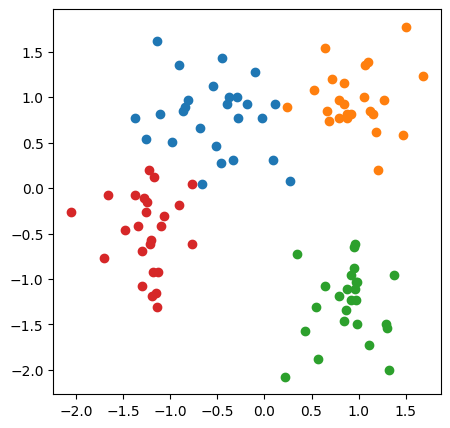

In [280]:
plt.figure(figsize=(5, 5))
for i in range(K):
    index = np.where(y_pred==i)
    x = X_trans[index, 0]
    y = X_trans[index, 1]
    plt.scatter(x, y)

plt.show()


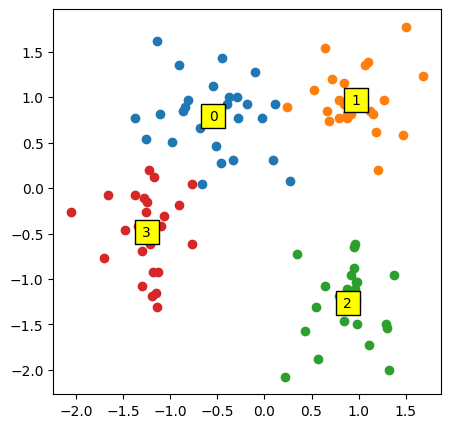

In [281]:
centers = kmeans.cluster_centers_
plt.figure(figsize=(5, 5))
for i in range(K):
    index = np.where(y_pred==i)
    x = X_trans[index, 0]
    y = X_trans[index, 1]
    plt.scatter(x, y)
    cx = centers[i, 0]
    cy = centers[i, 1]
    plt.scatter(cx, cy, c='yellow', s=300, ec='black', marker='s')  
    plt.text(cx, cy, i, ha='center', va='center')
    #plt.text(cx, cy, i, backgroundcolor='y', size=6, ha='center')

plt.show()

In [282]:
X_org = scaler.inverse_transform(X_trans)
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [283]:
centers_org = scaler.inverse_transform(centers)
centers_org

array([[ 4.04115385, 74.5       ],
       [ 8.08333333, 79.125     ],
       [ 7.8552    , 20.96      ],
       [ 2.1528    , 41.24      ]])

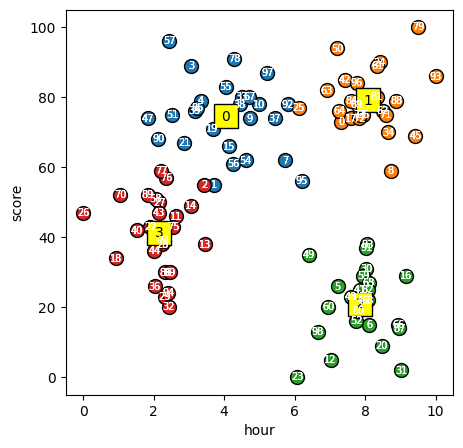

In [284]:
plt.figure(figsize=(5, 5))
for i in range(K):
    index = np.where(y_pred==i)
    x = X_org[index, 0]
    y = X_org[index, 1]
    plt.scatter(x, y, s=100, ec='black')
    cx = centers_org[i, 0]
    cy = centers_org[i, 1]
    plt.scatter(cx, cy, c='yellow', s=300, ec='black', marker='s')  
    plt.text(cx, cy, i, ha='center', va='center')
    #plt.text(cx, cy, i, backgroundcolor='y', size=6, ha='center')
    plt.xlabel('hour')
    plt.ylabel('score')
    for idx, x in enumerate(X_org):
        plt.text(x[0], x[1], idx, ha='center', va='center', c='white', size=7)

plt.show()

In [285]:
dataset.iloc[57,:]

hour        2.44
score      96.00
cluster     0.00
Name: 57, dtype: float64

In [286]:
dataset.iloc[31,:]

hour       9.02
score      2.00
cluster    2.00
Name: 31, dtype: float64

In [287]:
#KMeans 모델생성
def model_kmeans(K):
    import pandas as pd
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=K, random_state=0)

    dataset = pd.read_csv('data/KMeansData.csv')
    X = dataset.iloc[:, [0,1]].values
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_trans = scaler.fit_transform(X)
    kmeans.fit(X_trans)
    
    centers_org = scaler.inverse_transform(kmeans.cluster_centers_)

    return kmeans, X, X_trans, centers_org

In [288]:
kmeans, X, X_trans, centers_org = model_kmeans(5)
y_pred = kmeans.fit_predict(X)
y_pred

array([2, 0, 0, 4, 2, 1, 1, 0, 0, 2, 2, 3, 1, 3, 0, 0, 1, 2, 3, 2, 1, 2,
       3, 1, 4, 2, 3, 0, 3, 1, 3, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 1, 4, 3,
       3, 2, 1, 2, 1, 3, 4, 2, 1, 1, 0, 2, 0, 4, 0, 1, 1, 4, 2, 2, 2, 1,
       1, 2, 1, 2, 0, 2, 2, 2, 3, 3, 0, 0, 4, 4, 1, 2, 1, 3, 2, 2, 3, 1,
       2, 0, 2, 3, 2, 4, 1, 0, 4, 4, 1, 3], dtype=int32)

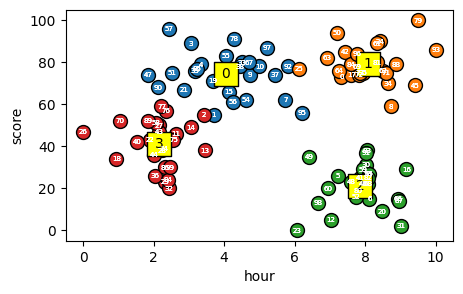

In [6]:
no=4
import numpy as np
kmeans, X_org, X_trans, centers_org = model_kmeans(no)
y_pred = kmeans.fit_predict(X_trans)

plt.figure(figsize=(5, 3))
for i in range(no):
    index = np.where(y_pred==i)
    x = X_org[index, 0]
    y = X_org[index, 1]
    plt.scatter(x, y, s=100, ec='black')
    cx = centers_org[i, 0]
    cy = centers_org[i, 1]
    plt.scatter(cx, cy, c='yellow', s=300, ec='black', marker='s')  
    plt.text(cx, cy, i, ha='center', va='center')
    plt.xlabel('hour')
    plt.ylabel('score')
    for idx, x in enumerate(X_org):
        plt.text(x[0], x[1], idx, ha='center', va='center', c='white', size=5)

plt.show()

In [294]:
df_stu = pd.read_csv('data/학사관리/학생.csv')
df_stu.head()

,학생번호,학생이름,학생학과,학년,생년월일,지도교수
0,92414029,서연우,전산,3,73/10/06,228
1,92414033,김창덕,전산,4,73/10/26,221
2,92514009,이지행,전자,4,73/11/16,311
3,92514023,김형명,전자,4,73/08/29,311
4,92454018,이원구,건축,3,74/09/30,509


In [295]:
df_pro = pd.read_csv('data/학사관리/교수.csv')
df_pro.head()

,교수번호,교수이름,교수학과,임용일,교수직급,급여
0,221,이병렬,전산,75/04/03,정교수,3000000
1,228,이재광,전산,91/09/19,부교수,2500000
2,311,강승일,전자,94/06/09,부교수,2300000
3,509,오문환,건축,92/10/14,조교수,2000000


In [304]:
stu = list(df_stu['학생이름'])
pro = list(df_pro['교수이름'])
names = stu + pro
names
print(names)

['서연우', '김창덕', '이지행', '김형명', '이원구', '이재영', '박혜경', '김수정', '홍길동', '이병렬', '이재광', '강승일', '오문환']


In [305]:
df = pd.read_csv("data/KMeansData.csv")
df['name'] = ''
df.head(2)

,hour,score,name
0,7.33,73,
1,3.71,55,


In [394]:
import random
idx = random.randint(0, len(names)-1)
idx, names[idx]

(8, '홍길동')

In [400]:
for i in range(len(df)):
    import random
    idx = random.randint(0, len(names)-1)
    df.loc[i, 'name'] = names[idx]
df.tail()

,hour,score,name
95,6.21,56,김형명
96,7.76,84,서연우
97,5.22,87,이병렬
98,6.65,13,김창덕
99,2.46,30,이재광


In [402]:
kmeans, X, X_trans, centers_org = model_kmeans(4)
y_pred = kmeans.fit_predict(X_trans)
df['cluster'] = y_pred
df.tail()

,hour,score,name,cluster
95,6.21,56,김형명,0
96,7.76,84,서연우,1
97,5.22,87,이병렬,0
98,6.65,13,김창덕,2
99,2.46,30,이재광,3


In [416]:
for i in range(4):
    filt = df['cluster'] == i
    df2 = df[filt]
    print(f'{i}그룹 {len(df2)}명..................................')  
    index = df2.index

    count = 0
    for idx in index:
        print(f'{idx}:{df.loc[idx, "name"]}', end=',')
        count += 1
        if count % 10 == 0 : print()

    print()
    print('-'*50)

0그룹 26명..................................
1:김수정,3:이지행,4:이재영,7:서연우,9:이병렬,10:김수정,15:서연우,19:이병렬,21:오문환,33:강승일,
37:김수정,38:이재영,39:이지행,47:이재광,51:김창덕,54:이지행,55:이재광,56:이재영,57:이재영,67:이원구,
78:서연우,85:홍길동,90:이지행,92:홍길동,95:김형명,97:이병렬,
--------------------------------------------------
1그룹 24명..................................
0:김형명,8:김형명,17:이재영,24:서연우,25:김형명,34:이재광,35:김창덕,42:서연우,45:홍길동,50:오문환,
61:이재광,62:이원구,63:이재광,64:이재영,69:이병렬,71:이지행,72:이재영,73:이원구,79:이재광,81:김창덕,
84:서연우,88:오문환,93:오문환,96:서연우,
--------------------------------------------------
2그룹 25명..................................
5:이병렬,6:강승일,12:이병렬,16:김창덕,20:이지행,23:이재광,30:이병렬,31:홍길동,41:김형명,46:이지행,
48:이원구,49:김형명,52:홍길동,53:박혜경,59:이지행,60:박혜경,65:오문환,66:이재영,68:오문환,80:박혜경,
82:이원구,83:이재광,87:서연우,91:이지행,98:김창덕,
--------------------------------------------------
3그룹 25명..................................
2:이재광,11:김창덕,13:서연우,14:서연우,18:이재영,22:이병렬,26:이재영,27:강승일,28:오문환,29:이재영,
32:김수정,36:김창덕,40:오문환,43:김형명,44:오문환,58:박혜경,70:이원구,74:서연우,75:서연우,76:서연우,
77:김형명,86:이원구